In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm

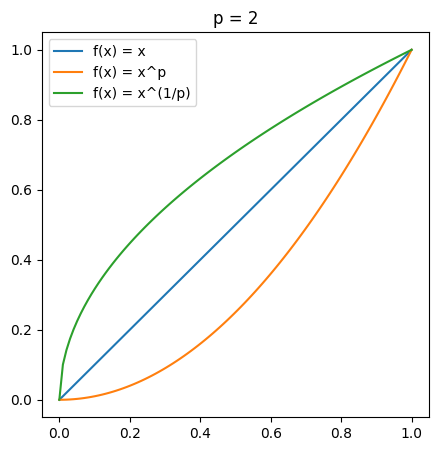

In [2]:
p = 2
fig = plt.figure(figsize=(5,5))
x = np.linspace(0, 1, 100)
plt.plot(x, x, label='f(x) = x')
plt.plot(x, x**p, label='f(x) = x^p')
plt.plot(x, x**(1/p), label='f(x) = x^(1/p)')
plt.legend()
plt.title("p = 2")
plt.savefig("graphics/p_pow.png")

In [3]:
df = pd.read_csv("data/movie_metadata.csv")
len(df.columns)

28

In [4]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
df = pd.read_csv("data/rows_without_missing_values.csv")
df.columns, len(df.columns)

(Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
        'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'genres',
        'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
        'num_user_for_reviews', 'content_rating', 'budget', 'title_year',
        'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes'],
       dtype='object'),
 17)

In [6]:
df.iloc[0]

num_critic_for_reviews                                 723.0
duration                                               178.0
director_facebook_likes                                  0.0
actor_3_facebook_likes                                 855.0
actor_1_facebook_likes                                1000.0
gross                                            760505847.0
genres                       Action|Adventure|Fantasy|Sci-Fi
num_voted_users                                       886204
cast_total_facebook_likes                               4834
facenumber_in_poster                                     0.0
num_user_for_reviews                                  3054.0
content_rating                                         PG-13
budget                                           237000000.0
title_year                                            2009.0
actor_2_facebook_likes                                 936.0
imdb_score                                               7.9
movie_facebook_likes    

In [7]:
columns = ["gross", "budget", "duration", "num_voted_users", "num_critic_for_reviews"]
cdf = df[columns]

In [8]:
gross = df["gross"].to_numpy()
scores = df["imdb_score"].to_numpy()

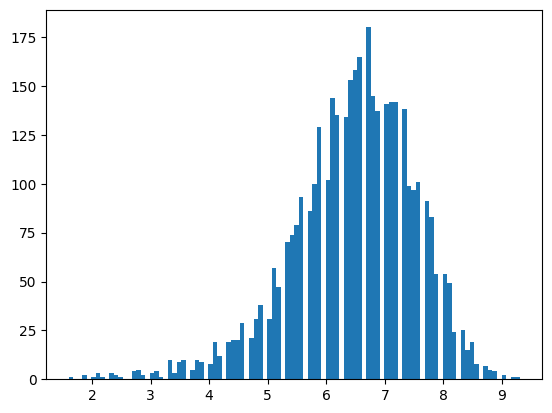

In [9]:
plt.hist(scores, bins=100)
plt.show()

In [11]:
def rescale(x, c=-1, d=1):
    a = x.min()
    b = x.max()
    scaled = ((d-c)*x - d*a + c*b) / (b-a)
    return scaled

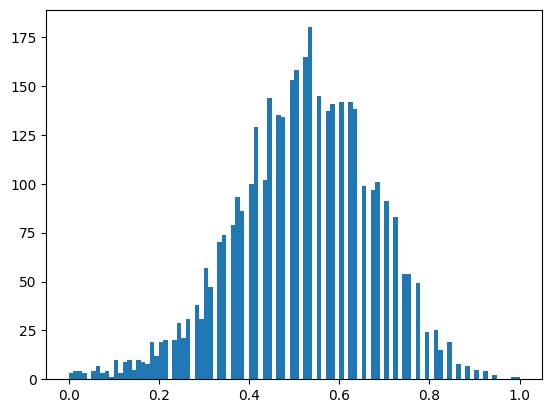

In [12]:
scaled = rescale(scores, c=0)
normalized_score = scaled**1.5
plt.hist(normalized_score, bins=100)
plt.show()

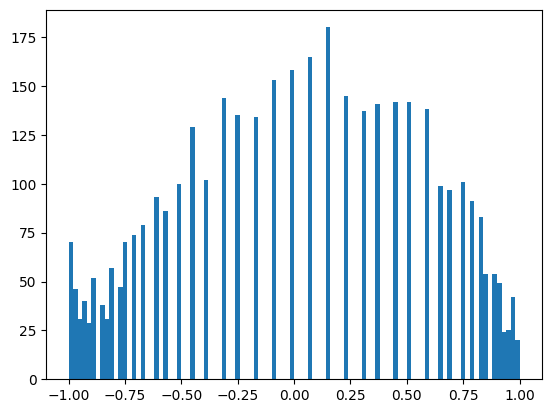

In [13]:
score_ = norm.cdf(normalized_score, loc=normalized_score.mean(), scale=np.sqrt(np.var(normalized_score)))
score_ = rescale(score_)
plt.hist(score_, bins=100)
plt.show()

In [14]:
mf = np.zeros(cdf.shape)
mf.shape

(3827, 5)

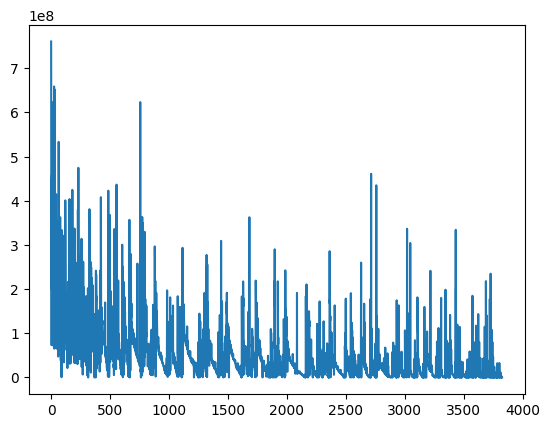

In [32]:
plt.plot(cdf["gross"])
plt.show()

# Distribution of Gross

## Distribution of the actual values

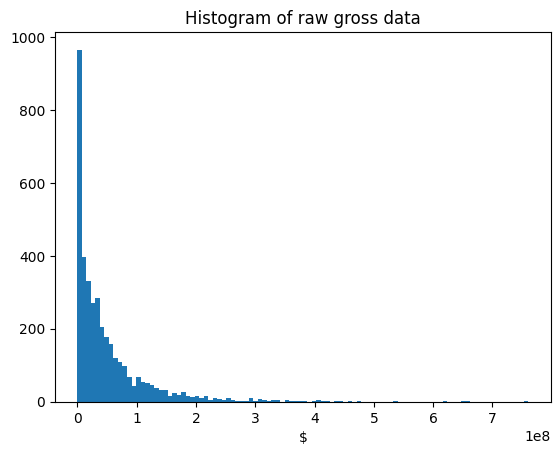

In [16]:
fig = plt.figure()
plt.hist(gross, bins=100)
plt.xlabel("$")
plt.title("Histogram of raw gross data")
plt.savefig("graphics/gross_raw.png", dpi=100)

We can see here that as expected, the distribution seems to follow an exponential distribution (https://en.wikipedia.org/wiki/Exponential_distribution ), where most of the data are in the bottom quartile and few that extend farther out than the rest. This suggests taking the logarithm of the data 

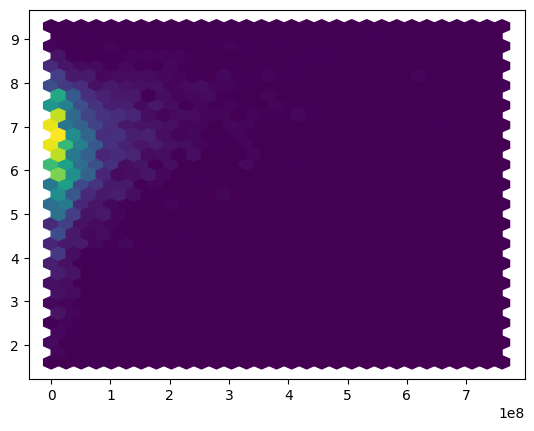

In [17]:
plt.hexbin(gross, scores, gridsize=30)
plt.show()

## Log of the distribution

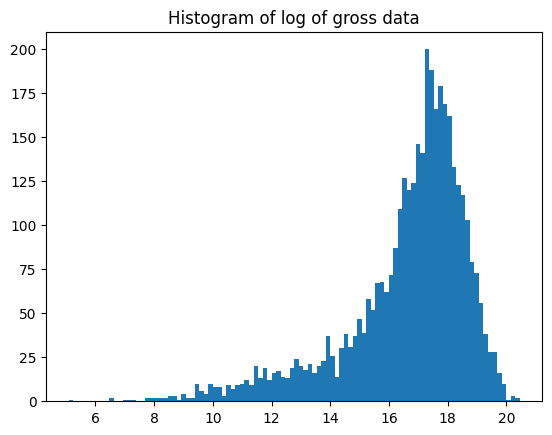

In [21]:
log_gross = np.log(gross)
plt.hist(log_gross, bins=100)
plt.title("Histogram of log of gross data")
plt.savefig("graphics/log_gross.png", dpi=100)

When we take the log, then we can immediately see that the distribution is closer to a normal distribution. However, it is heavily left skewed, so we can try to come up with some techniques to normalize or center the distribution.

We do this by first rescaling so that the values lie between 0 and 1 and then taking the cube of the distribution.

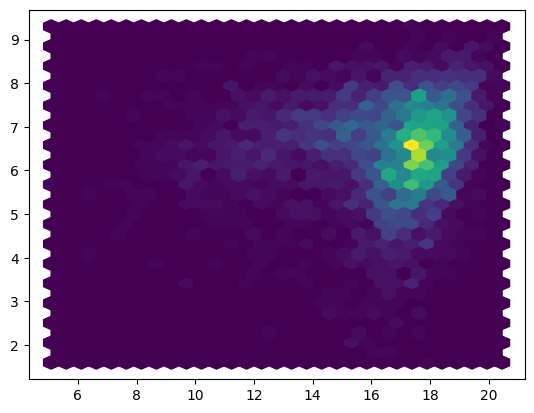

In [22]:
plt.hexbin(log_gross, scores, gridsize=30)
plt.show()

## Normalized log distribution between 0 and 1

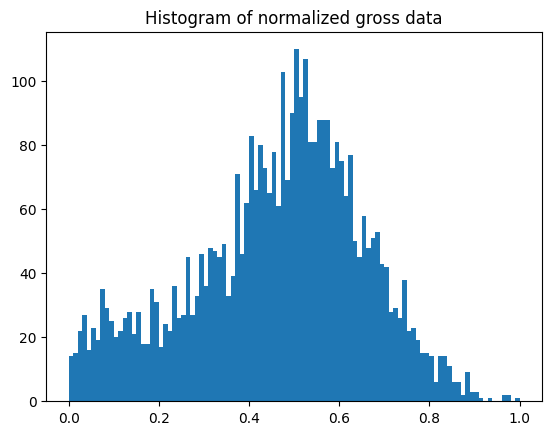

In [26]:
scaled = rescale(log_gross, c=0)
normalized = scaled**3
plt.hist(normalized, bins=100)
plt.title("Histogram of normalized gross data")
plt.savefig("graphics/scaled_centered_gross.png", dpi=100)

Now the distribution is centered and closely resembles a normal distribution. We could try to simply use this as our input or we can also think about transforming it to a uniform distribution.

## Transformed uniform distribution between -1 and 1

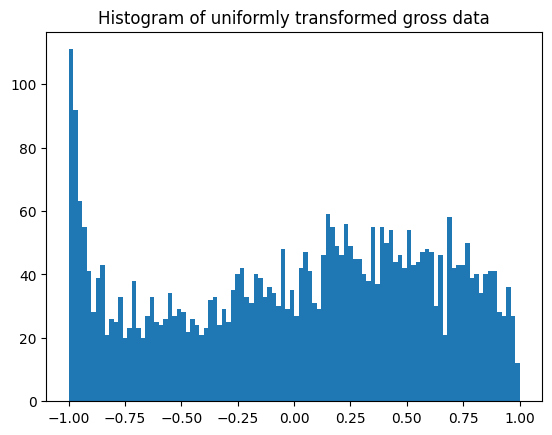

In [25]:
uniform = norm.cdf(normalized, loc=normalized.mean(), scale=np.sqrt(np.var(normalized)))
uniform = rescale(uniform)
plt.hist(uniform, bins=100)
plt.title("Histogram of uniformly transformed gross data")
plt.savefig("graphics/uniform_gross.png", dpi=100)

It could be more advantageous to use either the normal distribution or the uniform distribution. We can try using either to train and see how well the model performs. We can also hypothesize that it might be better to be biased towards either -1 or 1, which would then represent how much the movie made in a more binary manner (feature would then represent low income vs high income with not much middle ground). We can do this by taking the cube root of the uniform

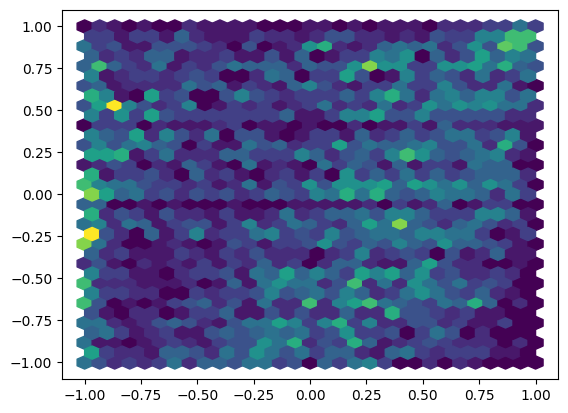

In [27]:
plt.hexbin(uniform, score_, gridsize=30)
plt.show()

In [28]:
mf[:, 0] = uniform
mf

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.95124432,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.88327757,  0.        ,  0.        ,  0.        ,  0.        ],
       ...,
       [-0.77931754,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.99735621,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.97504657,  0.        ,  0.        ,  0.        ,  0.        ]])

## Cube root of the uniform

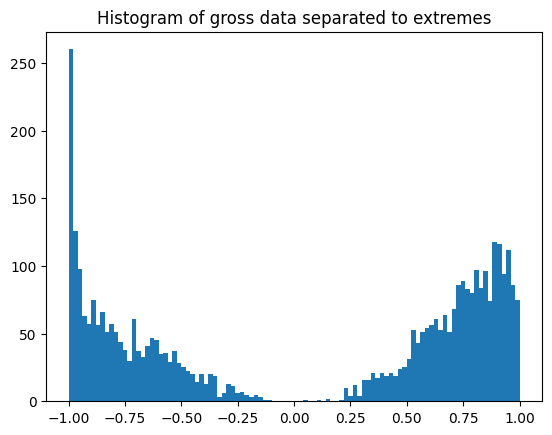

In [29]:
plt.hist(np.cbrt(uniform), bins=100)
plt.title("Histogram of gross data separated to extremes")
plt.savefig("graphics/cbrt_unif_gross.png", dpi=100)

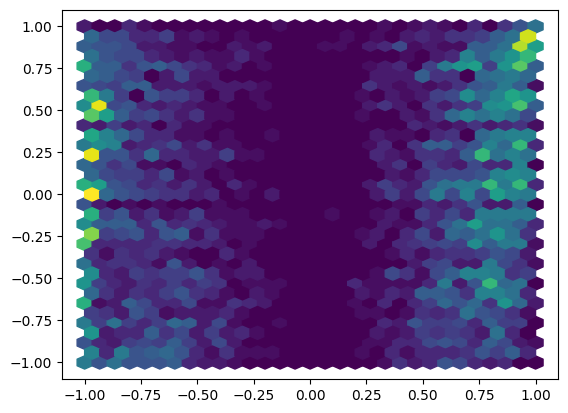

In [31]:
plt.hexbin(np.cbrt(uniform), score_, gridsize=30)
plt.show()

# Budget

In [33]:
budget = df["budget"].to_numpy()

## Budget distribution

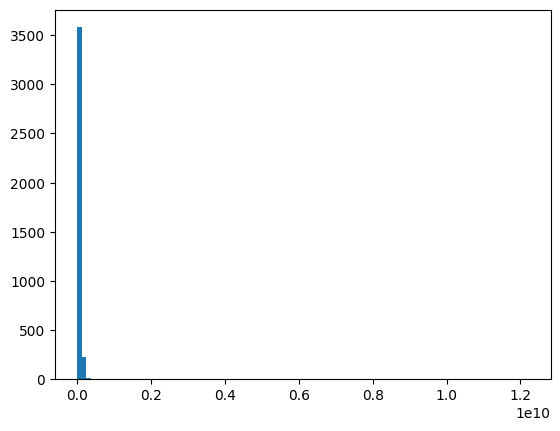

In [34]:
plt.hist(budget, bins=100)
plt.show()

This distribution is much more extreme than gross. we can simply try the same techniques to normalize the data.

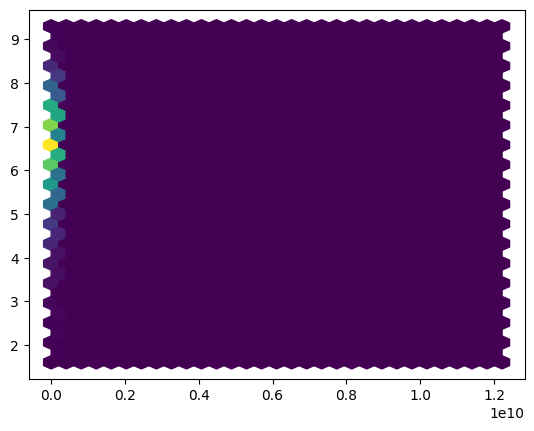

In [35]:
plt.hexbin(budget, scores, gridsize=30)
plt.show()

## Budget log

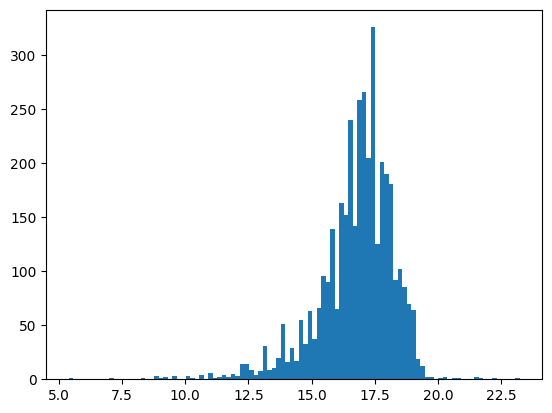

In [36]:
log_budget = np.log(budget)
plt.hist(log_budget, bins=100)
plt.show()

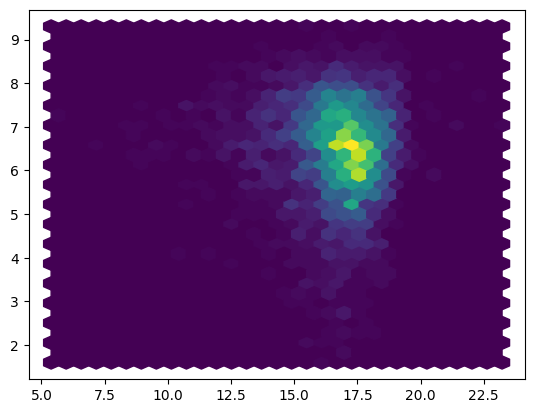

In [37]:
plt.hexbin(log_budget, scores, gridsize=30)
plt.show()

## Log normalized

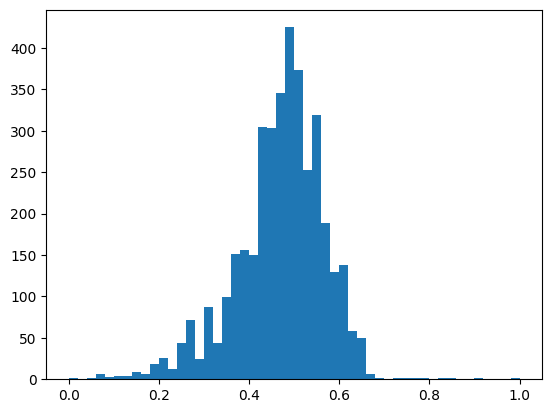

In [38]:
scaled = rescale(log_budget, c=0)
# The powers are just chosen experimentally to see which one normalizes it the best
normalized = scaled**1.7
plt.hist(normalized, bins=50)
plt.show()

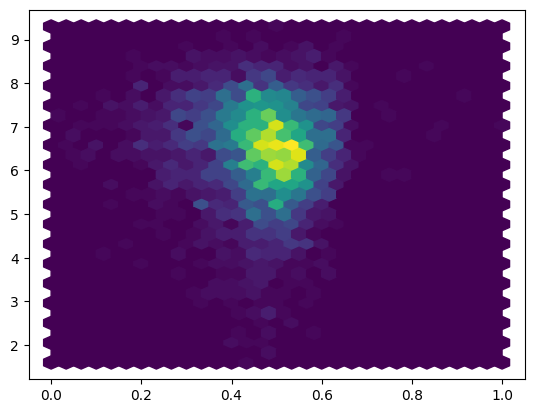

In [39]:
plt.hexbin(normalized, scores, gridsize=30)
plt.show()

## Budget uniform

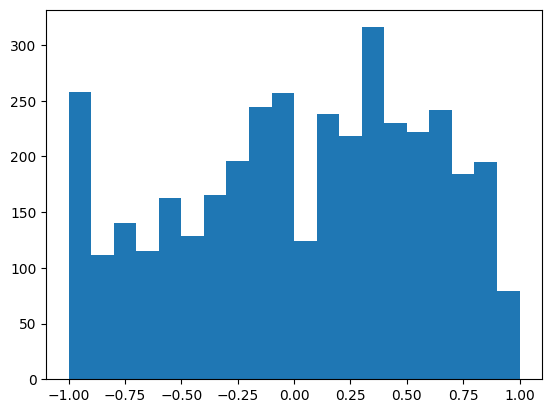

In [40]:
uniform = norm.cdf(normalized, loc=normalized.mean(), scale=np.sqrt(np.var(normalized)))
uniform = rescale(uniform)
plt.hist(uniform, bins=20)
plt.show()

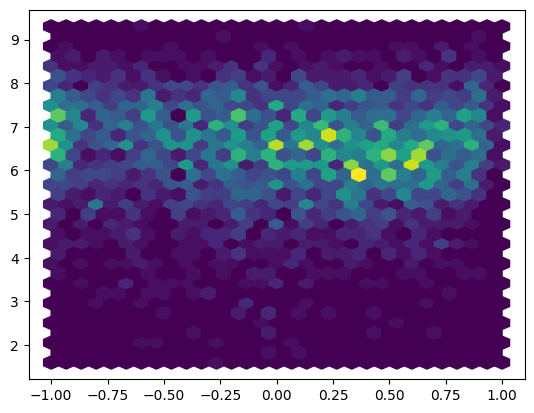

In [41]:
plt.hexbin(uniform, scores, gridsize=30)
plt.show()

In [42]:
mf[:, 1] = uniform
mf

array([[ 1.        ,  0.93799149,  0.        ,  0.        ,  0.        ],
       [ 0.95124432,  0.96046192,  0.        ,  0.        ,  0.        ],
       [ 0.88327757,  0.94166627,  0.        ,  0.        ,  0.        ],
       ...,
       [-0.77931754, -0.99996688,  0.        ,  0.        ,  0.        ],
       [-0.99735621, -0.99995262,  0.        ,  0.        ,  0.        ],
       [-0.97504657, -0.99999753,  0.        ,  0.        ,  0.        ]])

In [43]:
mf

array([[ 1.        ,  0.93799149,  0.        ,  0.        ,  0.        ],
       [ 0.95124432,  0.96046192,  0.        ,  0.        ,  0.        ],
       [ 0.88327757,  0.94166627,  0.        ,  0.        ,  0.        ],
       ...,
       [-0.77931754, -0.99996688,  0.        ,  0.        ,  0.        ],
       [-0.99735621, -0.99995262,  0.        ,  0.        ,  0.        ],
       [-0.97504657, -0.99999753,  0.        ,  0.        ,  0.        ]])

## Cube root (low budget vs high budget)

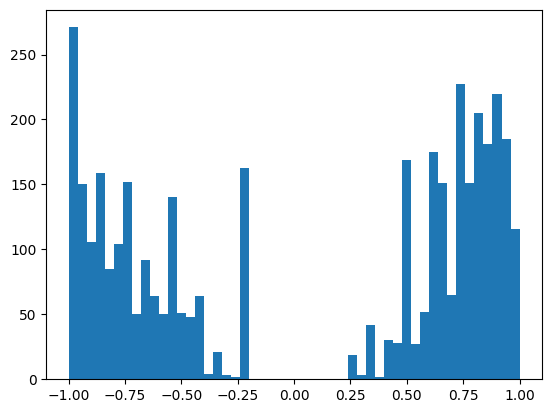

In [44]:
plt.hist(np.cbrt(uniform), bins=50)
plt.show()

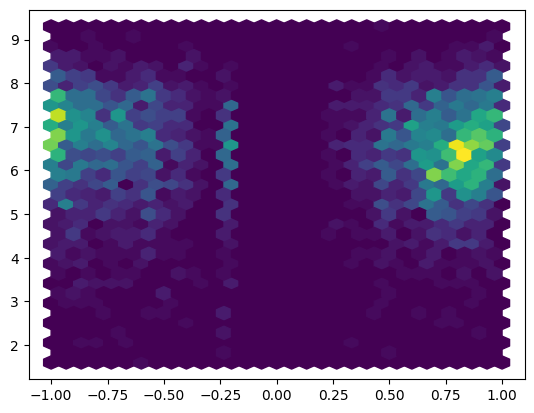

In [45]:
plt.hexbin(np.cbrt(uniform), scores, gridsize=30)
plt.show()

# Duration

## Distribution

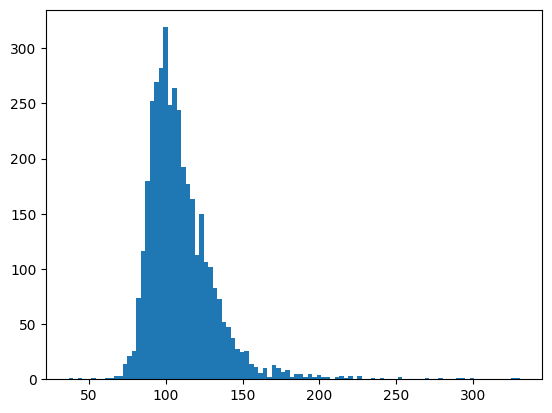

In [46]:
dur = df["duration"].to_numpy()
plt.hist(dur, bins=100)
plt.show()

 Duration seems to follow a normal distribution already but has a right skew. We normalize it using roots

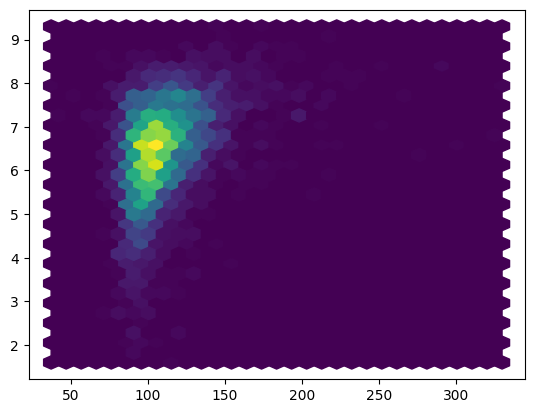

In [47]:
plt.hexbin(dur, scores, gridsize=30)
plt.show()

## Normalized

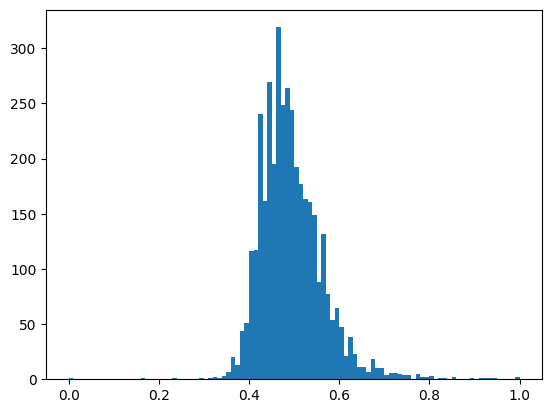

In [48]:
scaled = rescale(dur, c=0)
normalized = np.sqrt(scaled)
plt.hist(normalized, bins=100)
plt.show()

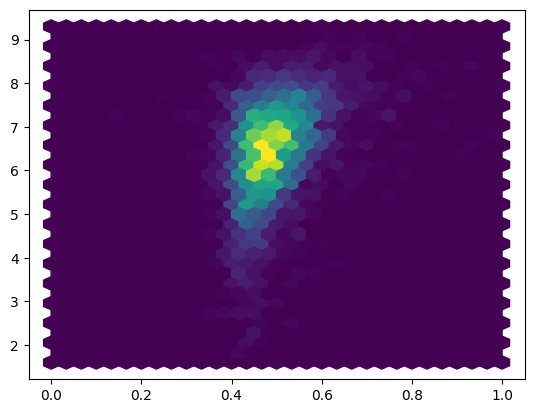

In [49]:
plt.hexbin(normalized, scores, gridsize=30)
plt.show()

## Uniform

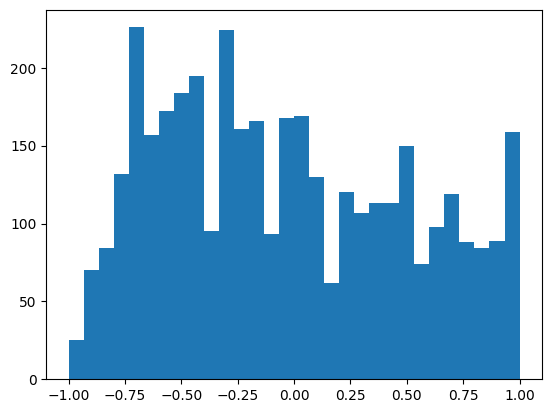

In [50]:
uniform = norm.cdf(normalized, loc=normalized.mean(), scale=np.sqrt(np.var(normalized)))
uniform = rescale(uniform)
plt.hist(uniform, bins=30)
plt.show()

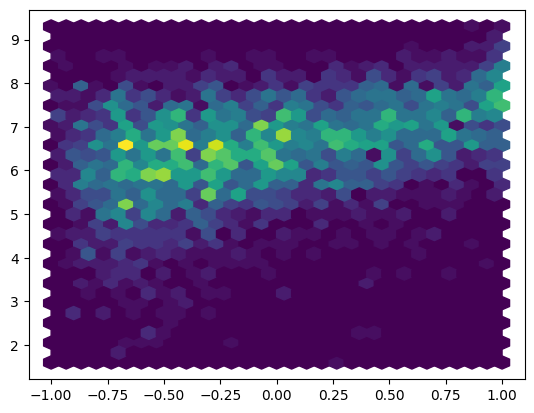

In [51]:
plt.hexbin(uniform, scores, gridsize=30)
plt.show()

In [52]:
mf[:, 2] = uniform
mf

array([[ 1.        ,  0.93799149,  0.99519675,  0.        ,  0.        ],
       [ 0.95124432,  0.96046192,  0.98764807,  0.        ,  0.        ],
       [ 0.88327757,  0.94166627,  0.9136169 ,  0.        ,  0.        ],
       ...,
       [-0.77931754, -0.99996688, -0.86814242,  0.        ,  0.        ],
       [-0.99735621, -0.99995262, -0.51338298,  0.        ,  0.        ],
       [-0.97504657, -0.99999753, -0.66934959,  0.        ,  0.        ]])

## Cube root (shorter movies vs longer movies)

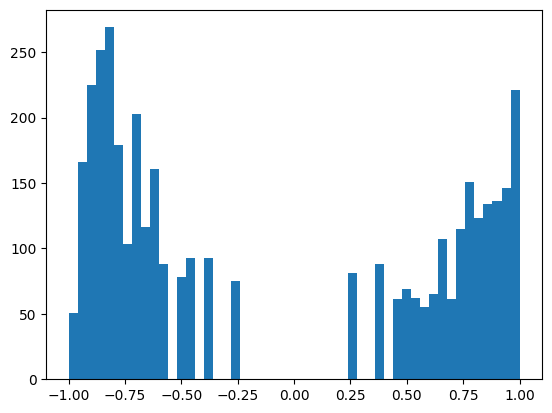

In [53]:
plt.hist(np.cbrt(uniform), bins=50)
plt.show()

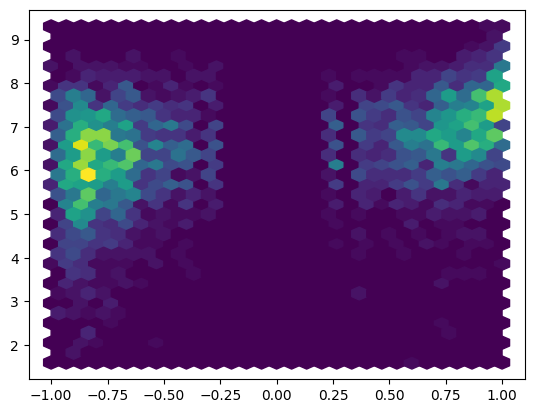

In [54]:
plt.hexbin(np.cbrt(uniform), scores, gridsize=30)
plt.show()

In [55]:
columns = ["gross", "budget", "duration", "num_voted_users", "num_critic_for_reviews"]
cdf = df[columns]

In [56]:
x4 = cdf["num_voted_users"].to_numpy()

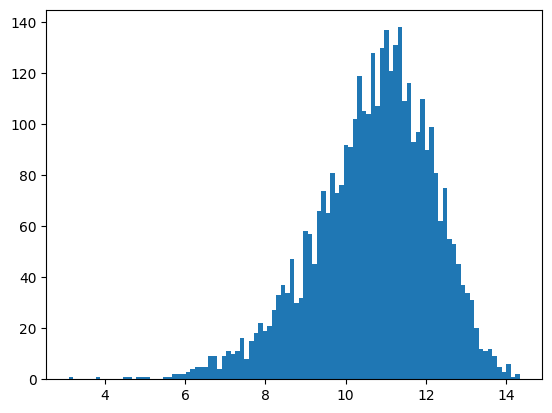

In [57]:
log_x4 = np.log(x4)
plt.hist(log_x4, bins=100)
plt.show()

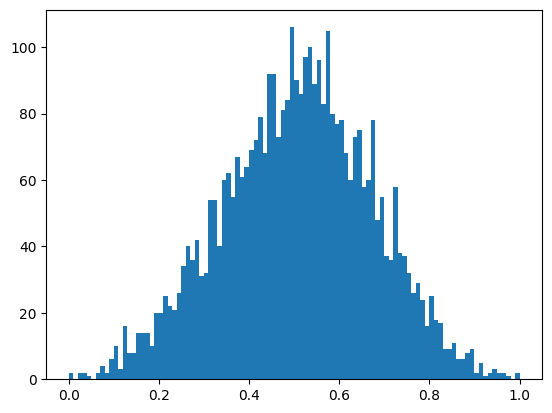

In [58]:
scaled = rescale(log_x4, c=0)
normalized = scaled**1.8
plt.hist(normalized, bins=100)
plt.show()

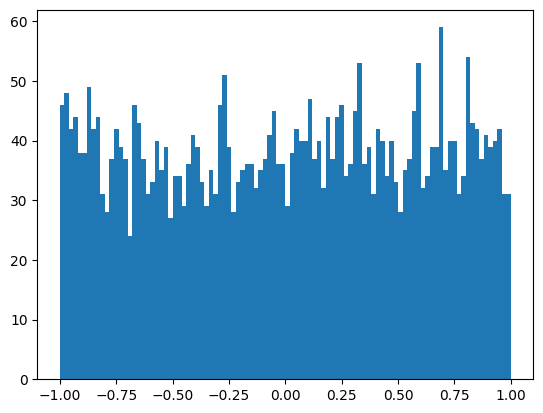

In [59]:
uniform = norm.cdf(normalized, loc=normalized.mean(), scale=np.sqrt(np.var(normalized)))
uniform = rescale(uniform)
plt.hist(uniform, bins=100)
plt.show()

In [60]:
mf[:, 3] = uniform
mf

array([[ 1.        ,  0.93799149,  0.99519675,  0.98465697,  0.        ],
       [ 0.95124432,  0.96046192,  0.98764807,  0.92968971,  0.        ],
       [ 0.88327757,  0.94166627,  0.9136169 ,  0.82000514,  0.        ],
       ...,
       [-0.77931754, -0.99996688, -0.86814242,  0.02836892,  0.        ],
       [-0.99735621, -0.99995262, -0.51338298, -0.96445497,  0.        ],
       [-0.97504657, -0.99999753, -0.66934959, -0.87363826,  0.        ]])

In [61]:
x5 = cdf["num_critic_for_reviews"].to_numpy()

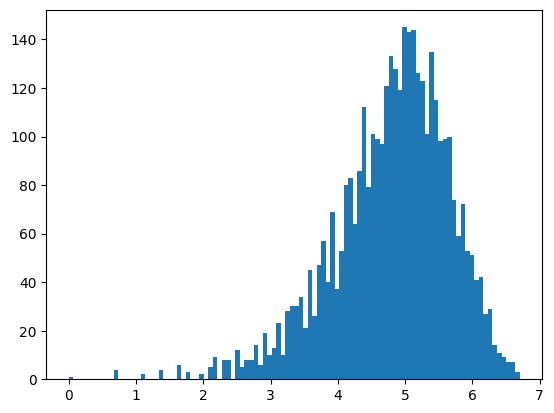

In [62]:
log_x5 = np.log(x5)
plt.hist(np.log(x5), bins=100)
plt.show()

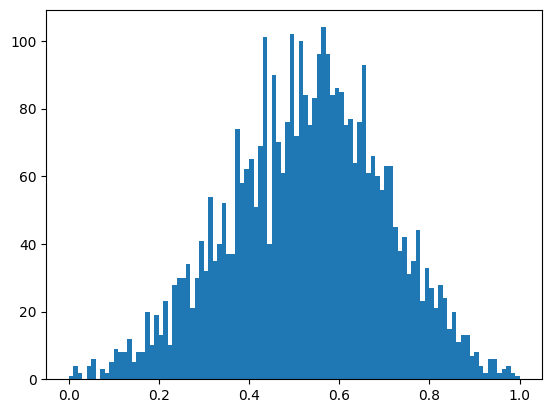

In [63]:
scaled = rescale(log_x5, c=0)
normalized = scaled**2
plt.hist(normalized, bins=100)
plt.show()

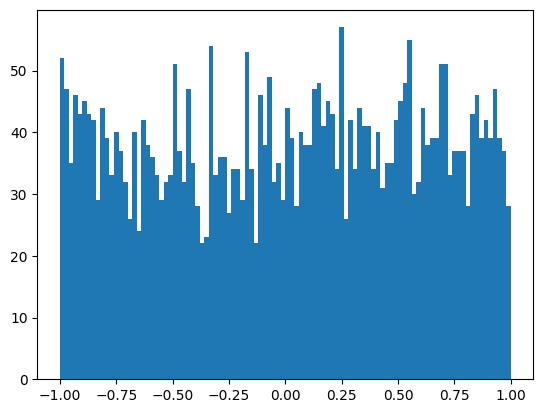

In [64]:
uniform = norm.cdf(normalized, loc=normalized.mean(), scale=np.sqrt(np.var(normalized)))
uniform = rescale(uniform)
plt.hist(uniform, bins=100)
plt.show()

In [65]:
mf[:, 4] = uniform

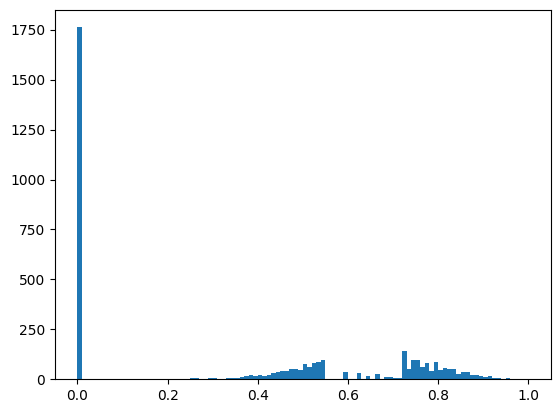

In [67]:
evans = pd.read_csv("data/evans.csv")
evans.head()
plt.hist(evans["movie_facebook_likes"], bins=100)
plt.show()

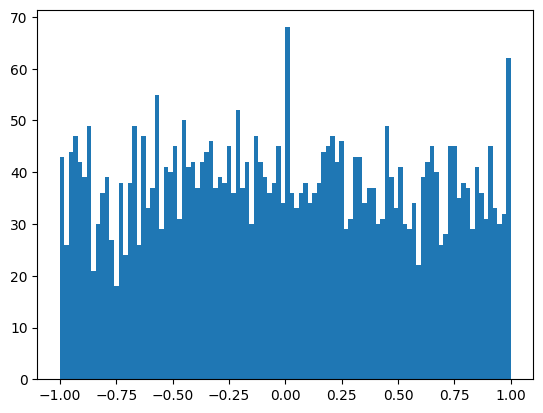

In [68]:
chris = pd.read_csv("data/chris_features.csv")
chris.head()
plt.hist(chris["num_user_for_reviews"], bins=100)
plt.show()

In [69]:
evans = evans.to_numpy()
evans.shape

(3827, 7)

In [70]:
chris = chris.to_numpy()
chris.shape

(3827, 37)

In [71]:
mf.shape

(3827, 5)

In [72]:
final_data = np.hstack([mf, chris, evans])

In [73]:
final_data[:, -1] = final_data[:, -1] / 10

In [74]:
np.save("data/final_data.npy", final_data)

In [75]:
data = np.load("data/final_data.npy")

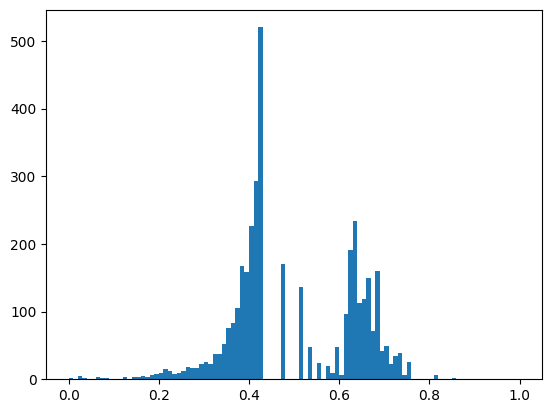

In [76]:
plt.hist(data[:, -7]**1.3, bins=100)
plt.show()

In [77]:
normalized = data[:, -7]**1.3

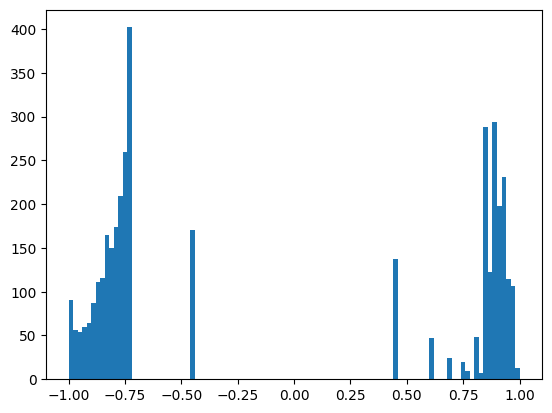

In [78]:
uniform = norm.cdf(normalized, loc=normalized.mean(), scale=np.sqrt(np.var(normalized)))
uniform = rescale(uniform)
plt.hist(np.cbrt(uniform), bins=100)
plt.show()

In [79]:
data[:, -7] = np.cbrt(uniform)

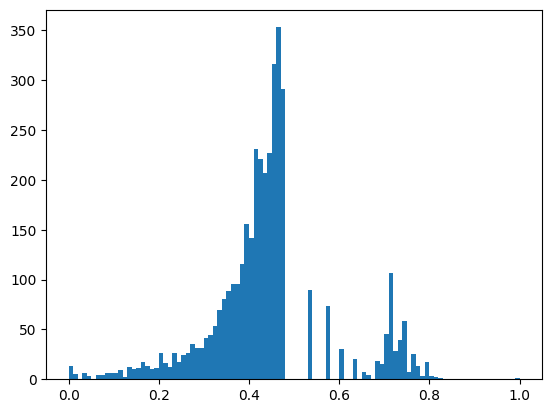

In [80]:
plt.hist(data[:, -6]**1.4, bins=100)
plt.show()

In [81]:
normalized = data[:, -6]**1.4

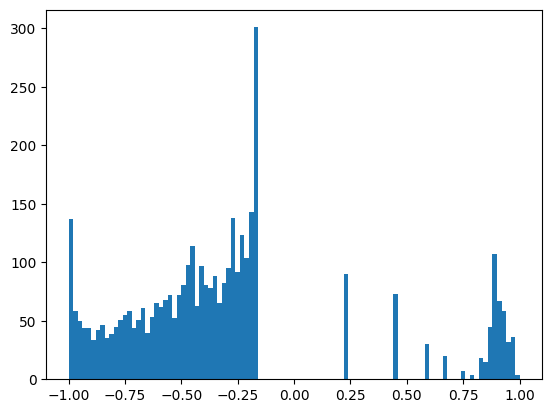

In [82]:
uniform = norm.cdf(normalized, loc=0.5, scale=np.sqrt(np.var(normalized)))
uniform = rescale(uniform)
plt.hist(uniform, bins=100)
plt.show()

In [83]:
data[:, -6] = uniform

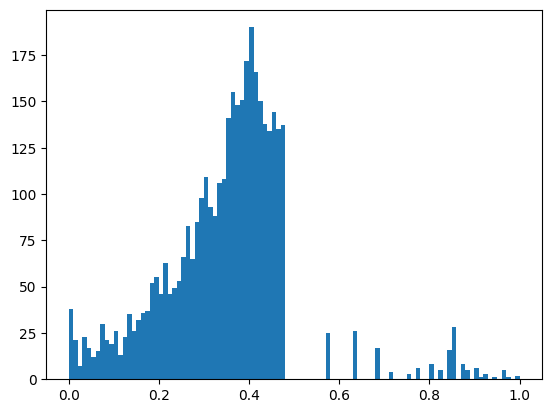

In [84]:
plt.hist(data[:, -5]**2, bins=100)
plt.show()

In [85]:
normalized = data[:, -5]**2

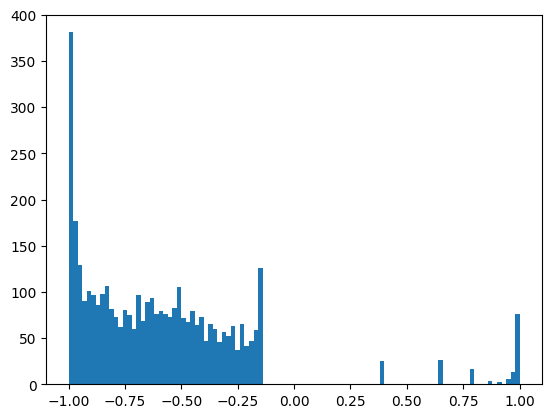

In [86]:
uniform = norm.cdf(normalized, loc=0.5, scale=np.sqrt(np.var(normalized)))
uniform = rescale(uniform)
plt.hist(uniform, bins=100)
plt.show()

In [87]:
data[:, -5] = uniform

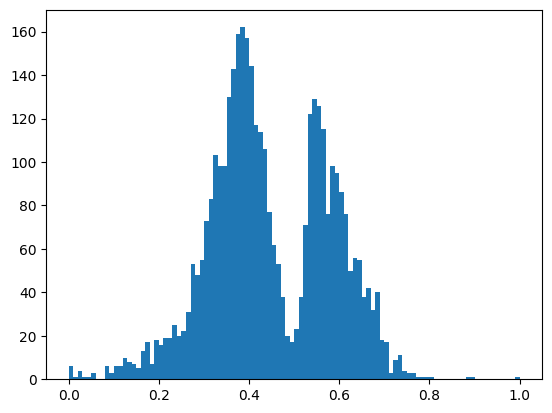

In [88]:
plt.hist(data[:, -4]**1.8, bins=100)
plt.show()

In [89]:
normalized = data[:, -4]**1.8

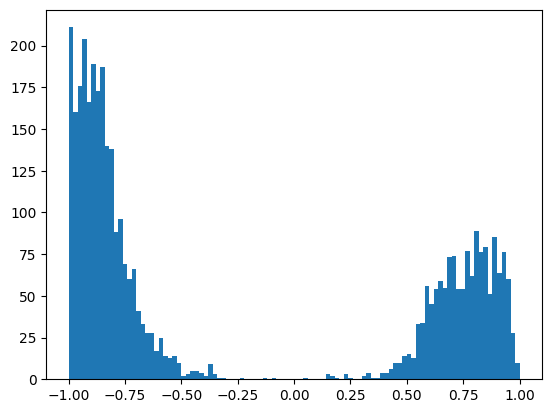

In [90]:
uniform = norm.cdf(normalized, loc=0.5, scale=np.sqrt(np.var(normalized)))
uniform = rescale(uniform)
plt.hist(np.cbrt(uniform), bins=100)
plt.show()

In [91]:
data[:, -4] = np.cbrt(uniform)

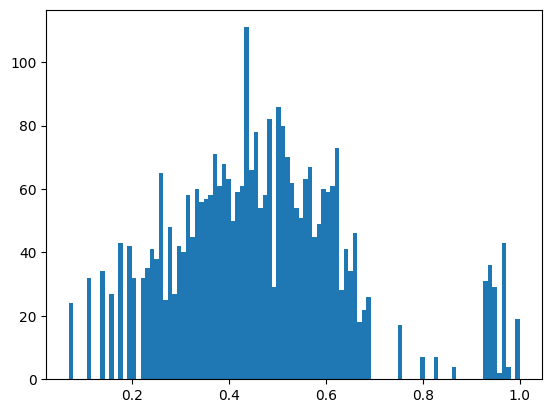

In [92]:
plt.hist(data[:, -3][data[:, -3] != 0], bins=100)
plt.show()

In [93]:
normalized = data[:, -3]
scale = np.sqrt(np.var(normalized[normalized!=0]))
scale

0.18371832456159592

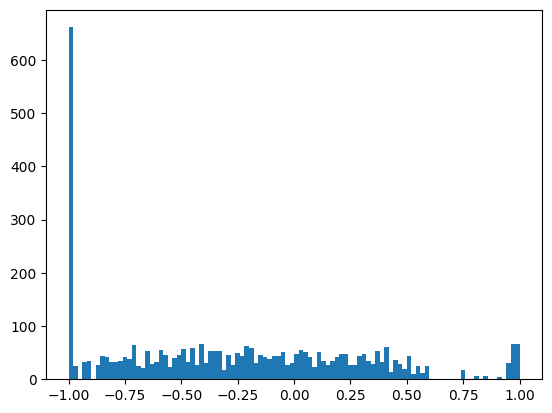

In [94]:
uniform = norm.cdf(normalized, loc=0.5, scale=np.sqrt(np.var(normalized)))
uniform = rescale(uniform)
plt.hist(uniform, bins=100)
plt.show()

In [95]:
data[:, -3] = uniform

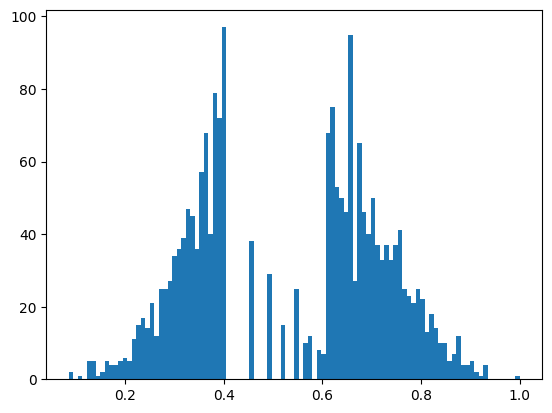

In [96]:
x = data[:, -2]**1.5
plt.hist(x[x != 0], bins=100)
plt.show()

In [97]:
np.sqrt(np.var(x[x!=0]))

0.19215337315247177

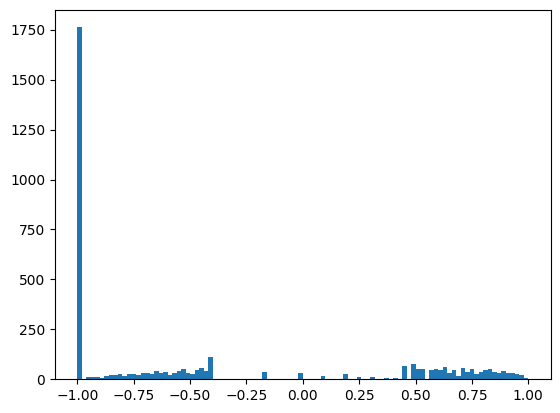

In [98]:
uniform = norm.cdf(x, loc=0.5, scale=np.sqrt(np.var(x[x!=0])))
uniform = rescale(uniform)
plt.hist(uniform, bins=100)
plt.show()

In [99]:
data[:, -2] = uniform

In [100]:
X = data[:, :-1]

In [101]:
y = data[:, -1]

In [104]:
np.save("data/X_normalized.npy", X)

In [105]:
np.save("data/y.npy", y)

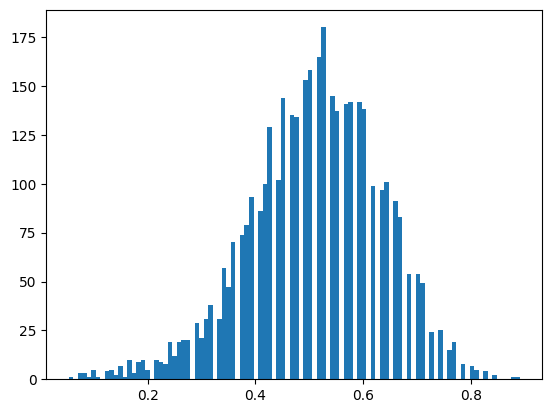

In [106]:
plt.hist(y**1.6, bins=100)
plt.show()

In [107]:
normalized = y**1.6

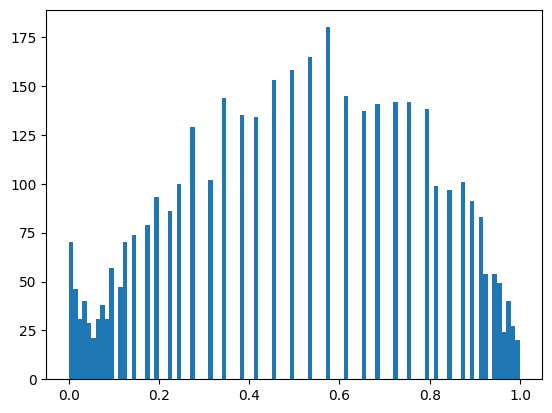

In [108]:
uniform = norm.cdf(normalized, loc=np.mean(normalized), scale=np.sqrt(np.var(normalized)))
plt.hist(uniform, bins=100)
plt.show()

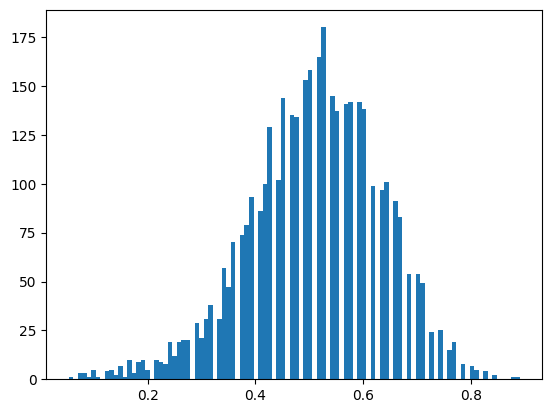

In [109]:
normal = norm.ppf(uniform, loc=np.mean(normalized), scale=np.sqrt(np.var(normalized)))
plt.hist(normal, bins=100)
plt.show()

In [110]:
normal**(1/1.6) - y

array([-1.11022302e-16,  0.00000000e+00,  0.00000000e+00, ...,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [111]:
mf = cdf.to_numpy()

In [112]:
mf[:, 0] = rescale(mf[:, 0], c=0)
mf[:, 1] = rescale(mf[:, 1], c=0)
mf[:, 2] = rescale(mf[:, 2], c=0)
mf[:, 3] = rescale(mf[:, 3], c=0)
mf[:, 4] = rescale(mf[:, 4], c=0)

In [113]:
evans = pd.read_csv("data/evans_NE.csv").to_numpy()

In [114]:
evans[:, 6] /= 10

In [115]:
chris = pd.read_csv("data/chris_NE.csv").to_numpy()

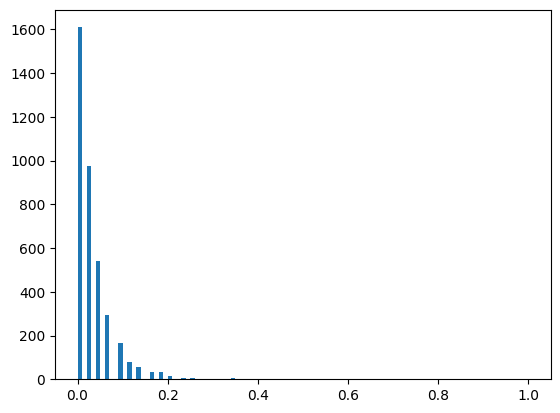

In [116]:
plt.hist(chris[:, 0], bins=100)
plt.show()

In [117]:
final_data = np.hstack([mf, chris, evans])

In [118]:
np.save("data/NE_data.npy", final_data)